# Chapter 4
## Adding on to the Quick Start: Switching Out the Dataset with Housing Data Case Study
This notebook is a companion to the book _XGBoost for Regression Predictive Modeling and Time Series Analysis_.
This chapter builds on the work you did in chapter two. In chapter two, you built a model that classified irises by species based on sepal and petal measurements. In this chapter we will build a regression model to predict the cost of a house based on multiple parameters. We will use another famous dataset, the housing data. The intent of this example is to allow you to understand what parts of the code are dataset specific when using XGBoost, and what are the same each time.  

## Housing value Predicter
We will be using a dataset that contains information about houses. We will train a model to predict the value of a house based on these characteristics.

# Setting up the python environment and ingesting the housing dataset

In [2]:
# ----------------------------------------
# filename housingvaluepredicter.ipynb
# purpose predict house value based on
# characteristics such as location, number 
# of rooms, number of bedrooms
# author Joyce Weiner
# revision 1.0
# revision history 1.0 - initial script
# ----------------------------------------

import pandas as pd
import numpy as np


In [3]:
# load the California Housing dataset from scikit-learn
from sklearn import datasets

housingX, housingy = datasets.fetch_california_housing (return_X_y=True, as_frame=True)

In [4]:
housingX.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [5]:
housingy.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

## Exploring the dataset by making graphs 
Next, we want to take a look at the dataset to check for missing data or other problems. To do this we'll make some plots using Seaborn.
Just as before with the iris data, I'm setting the color palette to "dark:grey" so that the output on your screen matches what's printed in the book. While color is fun, it also districts the viewer from the data. According to Edward Tufte, a leading expert in data visualization, we should stive to show the data "above all else" when making graphs. 

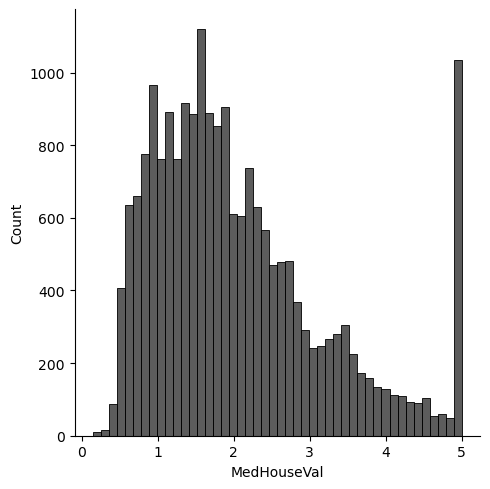

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette("dark:grey")

sns.displot(housingy, kind="hist")

## Looking for relationships with x-y plots 
Now, we want to see how the data relate to eachother by making some x-y plots. Seaborn makes this very easy to do by offering a function called pairplot.

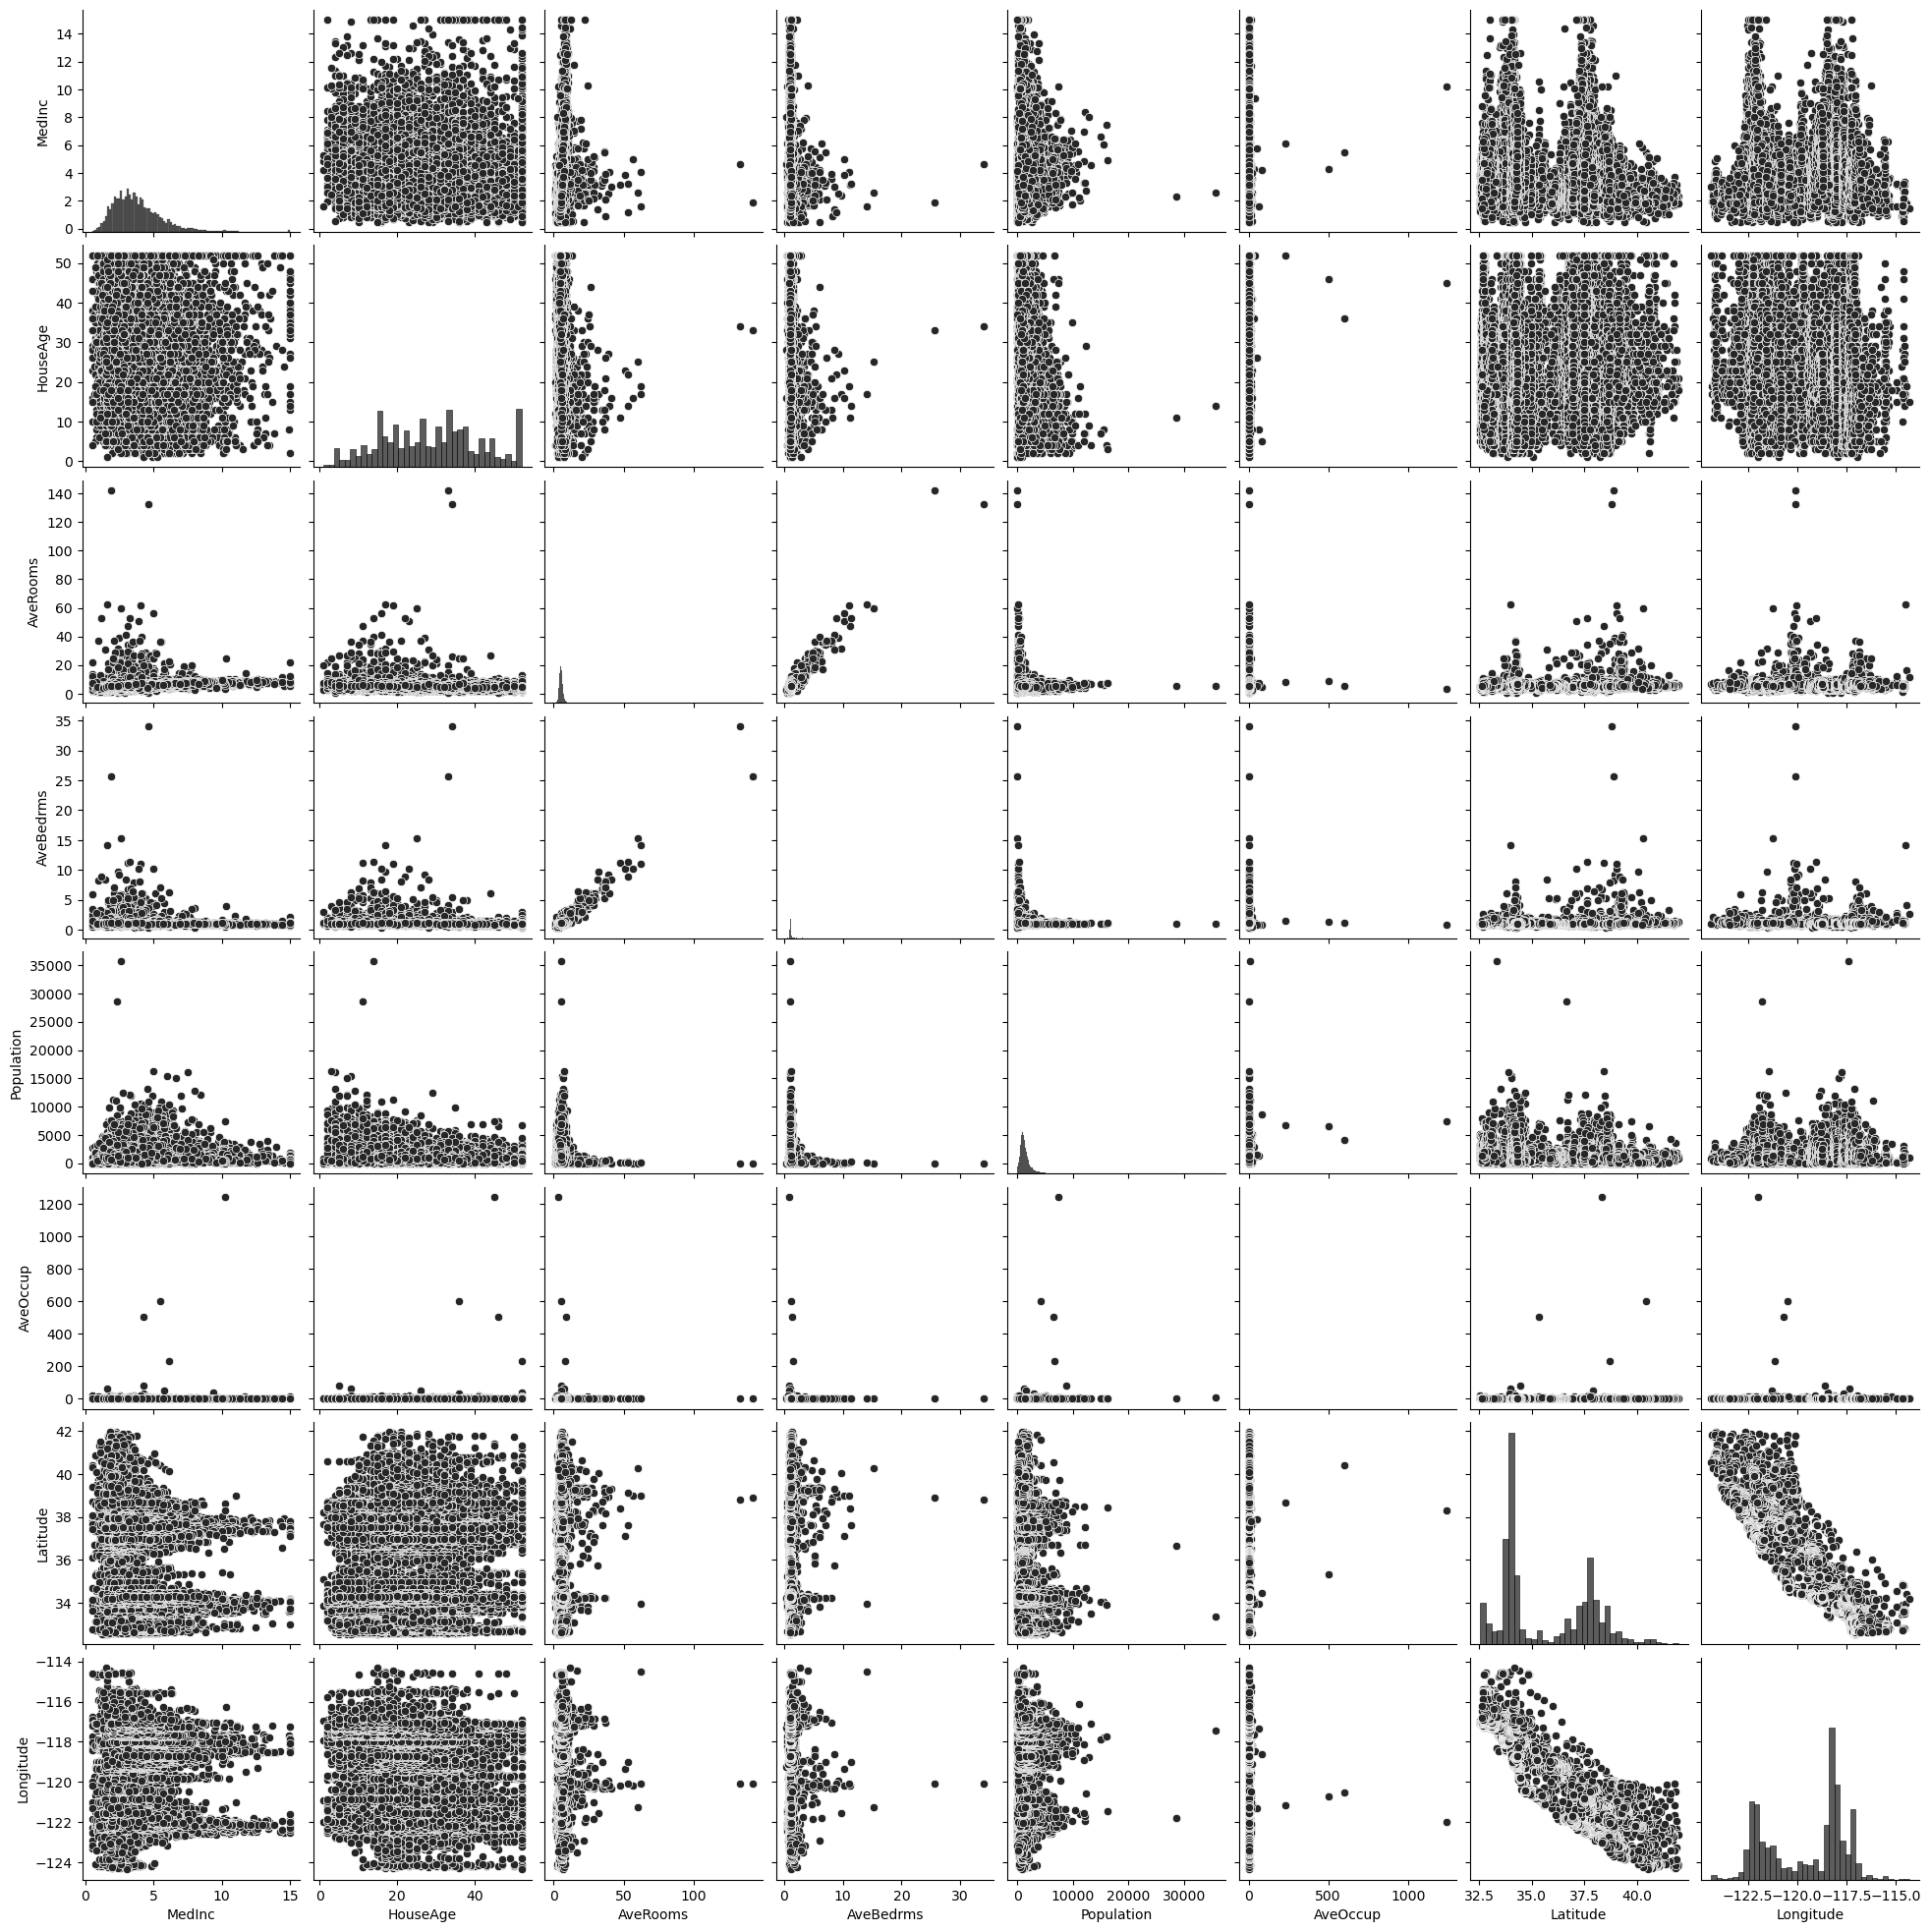

In [7]:
graphx = sns.pairplot(housingX)

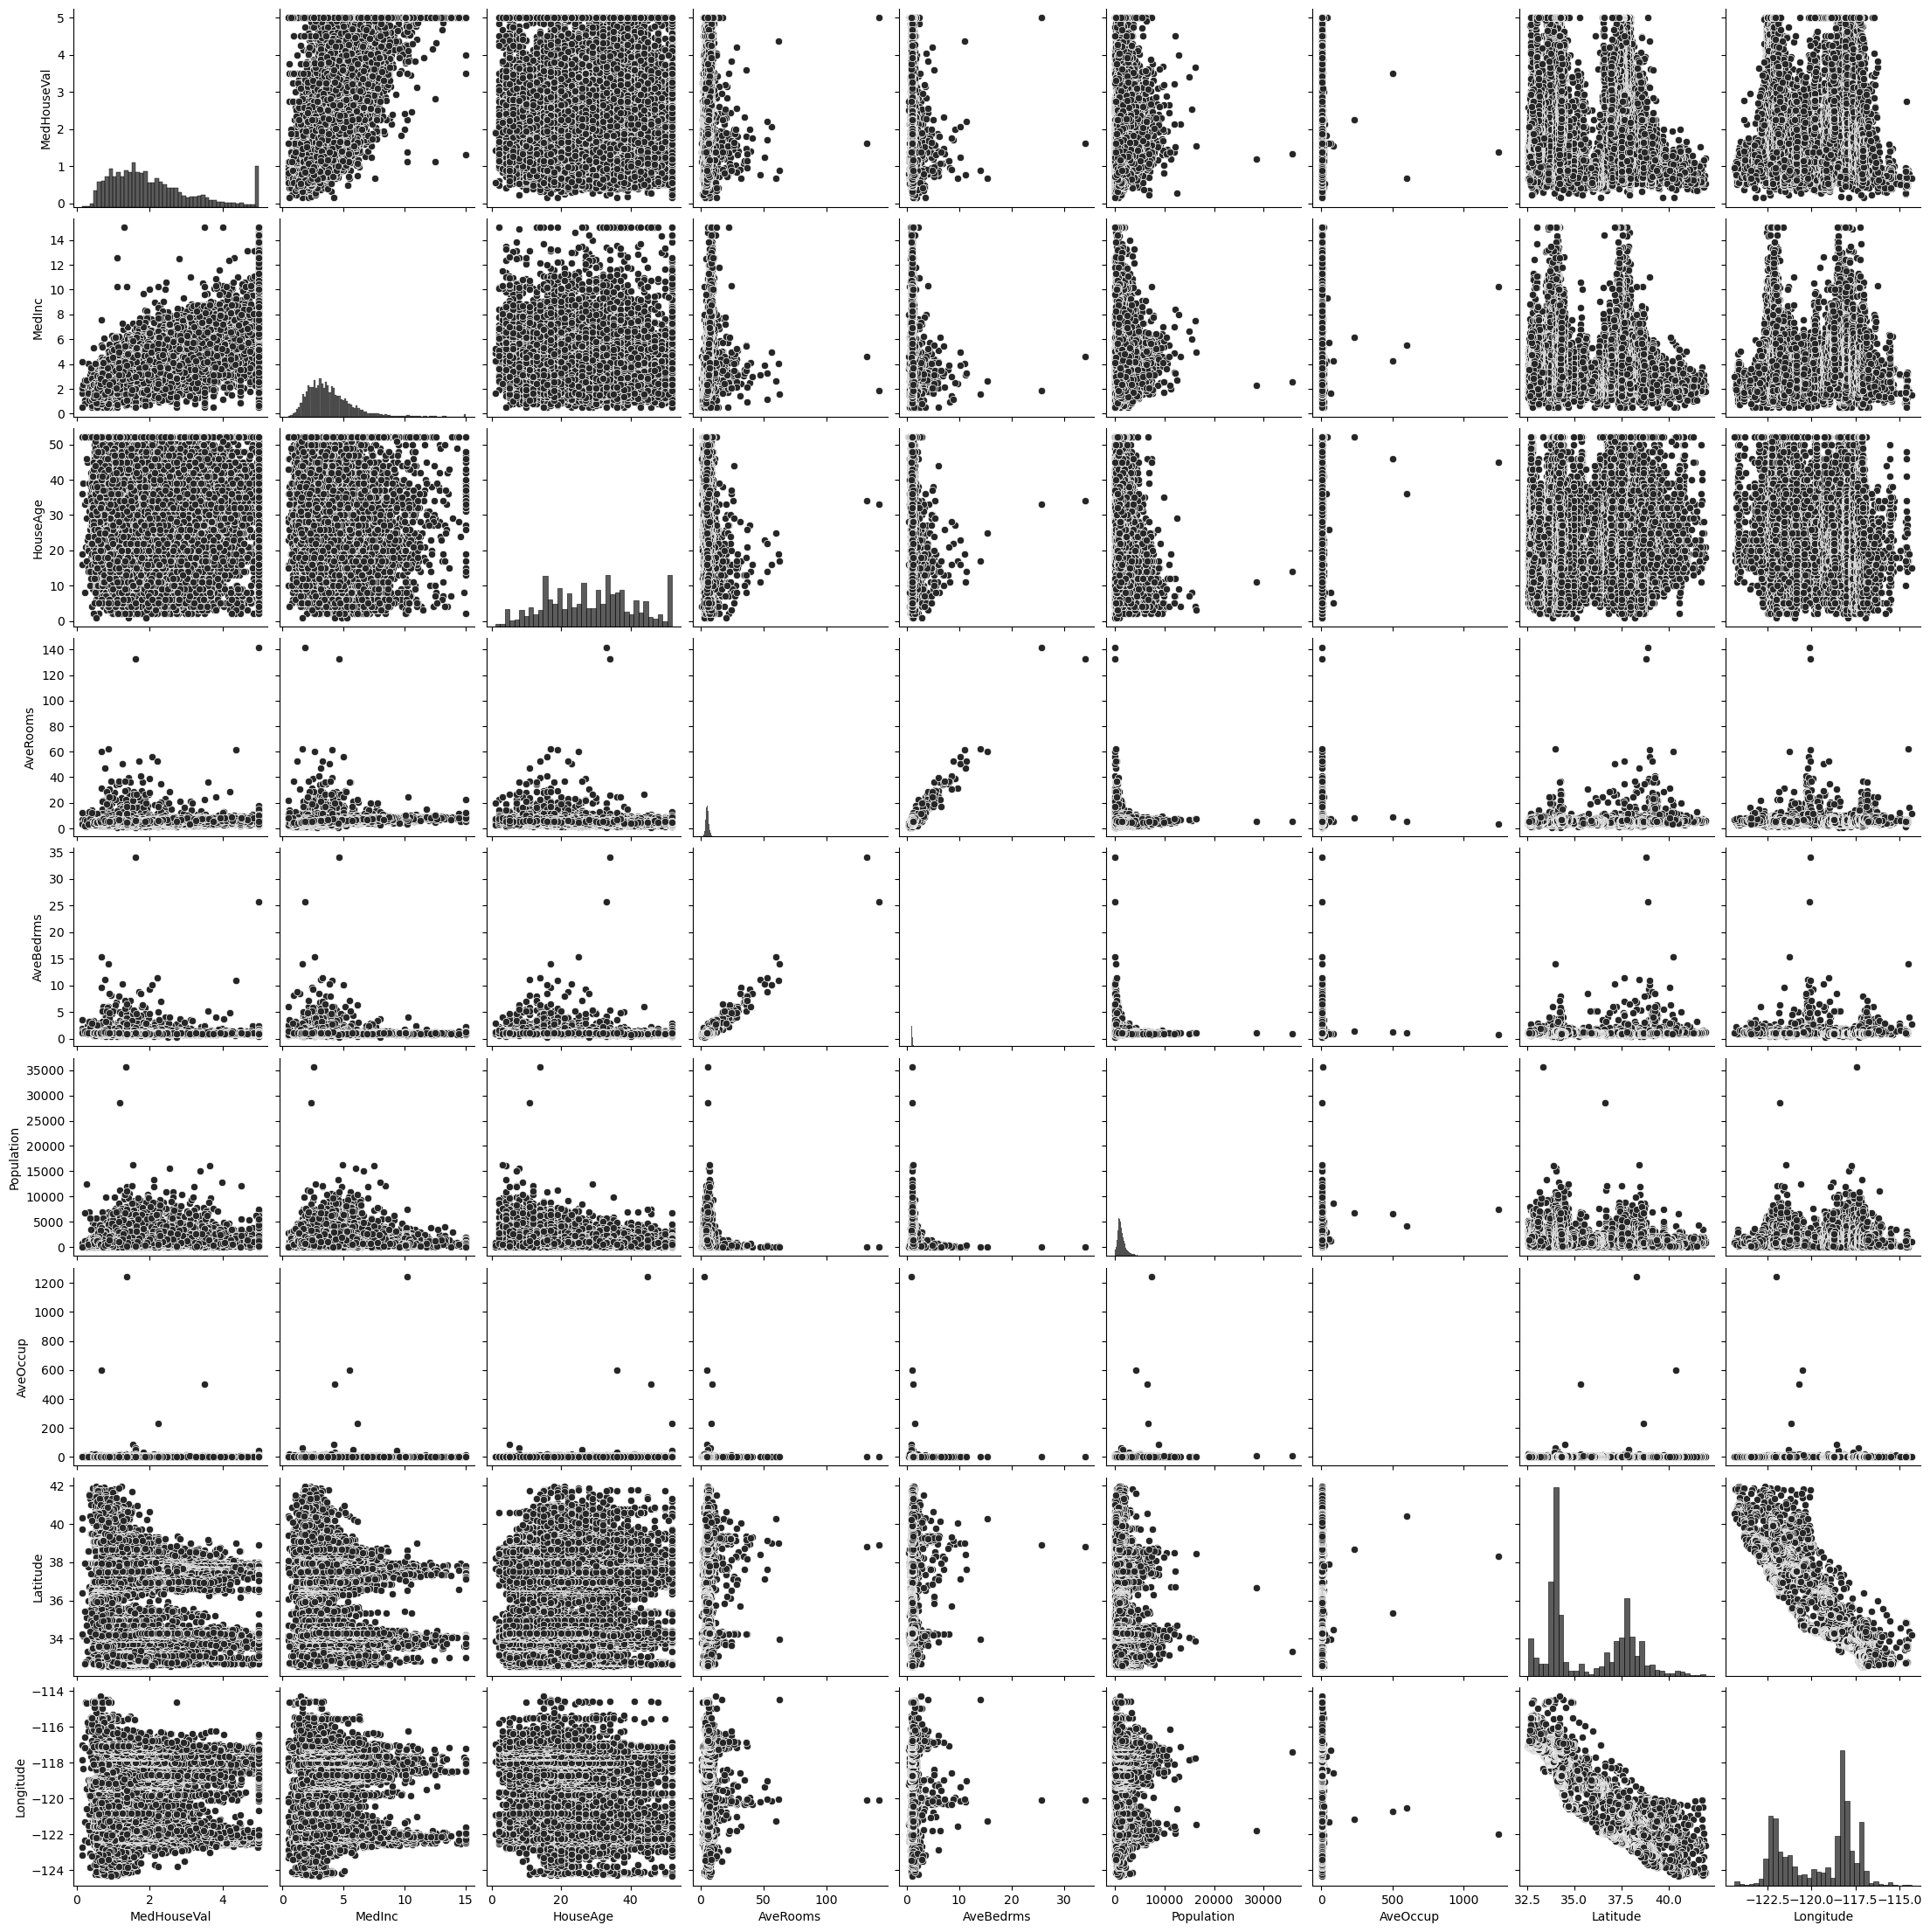

In [8]:
housingxy = pd.concat([housingy, housingX], axis=1)
graphxy = sns.pairplot(housingxy)

## Data preparation 
Next, we'll split the data into training and test sets using the scikit-learn train_test_split function

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(housingX,housingy, test_size=0.2, random_state=17)

In [10]:
X_train.shape

(16512, 8)

In [11]:
X_test.shape

(4128, 8)

In [12]:
y_train.shape

(16512,)

In [13]:
y_test.shape

(4128,)

In [14]:
X_test.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
18403,5.4741,24.0,6.587799,1.060181,4017.0,3.311624,37.24,-121.84
13405,1.9583,7.0,5.362805,1.442073,1064.0,3.243902,34.10,-117.46
9539,2.6058,40.0,3.885714,0.914286,785.0,4.485714,37.39,-120.71
8668,4.5817,30.0,4.146135,1.108696,1526.0,1.842995,33.82,-118.39
9019,8.0137,9.0,7.734673,1.041211,12873.0,3.274739,34.16,-118.78


Next, we'll set up XGBoost to perform a prediction using regression.

## XGBoost model settings and model training 

In [15]:
import xgboost as xgb
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

housevalue_regressor = xgb.XGBRegressor()

housevalue_regressor.fit(X_train,y_train, eval_set=[(X_test,y_test),(X_train,y_train)])

[0]	validation_0-rmse:1.43189	validation_1-rmse:1.44714
[1]	validation_0-rmse:1.10478	validation_1-rmse:1.10838
[2]	validation_0-rmse:0.88973	validation_1-rmse:0.88158
[3]	validation_0-rmse:0.75846	validation_1-rmse:0.73925
[4]	validation_0-rmse:0.67318	validation_1-rmse:0.64203
[5]	validation_0-rmse:0.62217	validation_1-rmse:0.58077
[6]	validation_0-rmse:0.59688	validation_1-rmse:0.54843
[7]	validation_0-rmse:0.57714	validation_1-rmse:0.51937
[8]	validation_0-rmse:0.56662	validation_1-rmse:0.50360
[9]	validation_0-rmse:0.55806	validation_1-rmse:0.48940
[10]	validation_0-rmse:0.54834	validation_1-rmse:0.47518
[11]	validation_0-rmse:0.54474	validation_1-rmse:0.46667
[12]	validation_0-rmse:0.53838	validation_1-rmse:0.45803
[13]	validation_0-rmse:0.52931	validation_1-rmse:0.44558
[14]	validation_0-rmse:0.52690	validation_1-rmse:0.43937
[15]	validation_0-rmse:0.52538	validation_1-rmse:0.43706
[16]	validation_0-rmse:0.51925	validation_1-rmse:0.42940
[17]	validation_0-rmse:0.51705	validation

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

## Making a prediction using XGBoost 
Now our model is trained, and we can use it to classify irises based on their measurements. Let's test out how well it does on our test dataset. We use the predict method and pass it the X_test data.

In [16]:
y_score = housevalue_regressor.predict(X_test)

Use the model with example data not in the test or training set (inference). 

In [17]:
X_example = np.array([12.5,10,9,3,4000,3,33.98,-118.45])
X_example = X_example.reshape(1,8)
y_example = housevalue_regressor.predict(X_example)
print(y_example)

[5.3823247]


That's all we need to do to use the model.
Now, we look at how well the model is working.

In [18]:
predicter_r2 = r2_score(y_true=y_test, y_pred= y_score)
print(predicter_r2)

0.8186237017741059


To do RMSE we need to take the square root of the mean_squared_error, which you get by using the squared=False option in the mean_squared_error function. 

In [19]:
predicter_rmse = mean_squared_error(y_true=y_test, y_pred=y_score, squared=False)
print (predicter_rmse)


0.48699478645182126


Our R2 is pretty good and the RMSE is middle of the range (lower is better). Let's plot the modeled values, the actuals and the residuals.

<Axes: xlabel='MedHouseVal'>

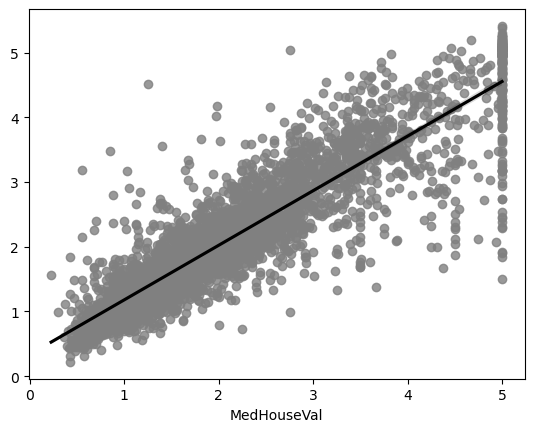

In [20]:
sns.regplot(x=y_test, y=y_score,  scatter_kws={"color": "grey"}, line_kws={"color": "black"})

To wrap this up, let's calculate and plot the residuals

In [21]:
residuals = y_test - y_score
print (residuals)

18403   -0.225832
13405    0.042021
9539    -0.249945
8668     0.515881
9019    -0.470594
           ...   
10696   -0.058746
20360   -0.252144
10281    0.487568
7092    -0.213285
3219     0.058771
Name: MedHouseVal, Length: 4128, dtype: float64


Visualize the residuals. First combine X_test and the residuals into one dataframe, then plot the residuals against each x parameter in a row of eight x-y scatter plots.

In [27]:
X_testResiduals = pd.concat([X_test, residuals], axis=1)

In [31]:
X_testResiduals.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
18403,5.4741,24.0,6.587799,1.060181,4017.0,3.311624,37.24,-121.84,-0.225832
13405,1.9583,7.0,5.362805,1.442073,1064.0,3.243902,34.10,-117.46,0.042021
9539,2.6058,40.0,3.885714,0.914286,785.0,4.485714,37.39,-120.71,-0.249945
8668,4.5817,30.0,4.146135,1.108696,1526.0,1.842995,33.82,-118.39,0.515881
9019,8.0137,9.0,7.734673,1.041211,12873.0,3.274739,34.16,-118.78,-0.470594


c:\Users\joyce\anaconda3\envs\xgboost_book_project\lib\site-packages\pandas\plotting\_matplotlib\core.py:1114: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


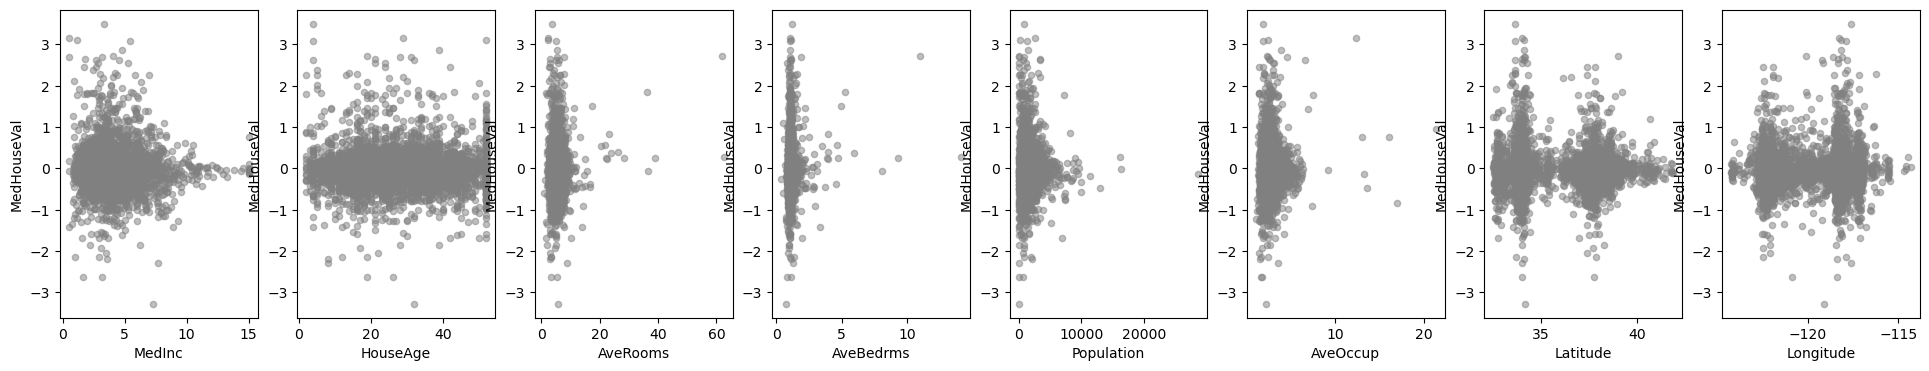

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=8, figsize=(24,4))

for xcol, ax in zip(X_test.loc[:].columns,axes):
    X_testResiduals.plot(kind="scatter", x=xcol, y="MedHouseVal", ax=ax, alpha=0.5, color="grey")
